In [1]:
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt

In [2]:
MLD = pd.read_csv('/gxfs_work1/geomar/smomw523/master-thesis/output_data/retention/MLD2009_s001_EOS80-full.csv',index_col=0)

In [3]:
MLD_tides = pd.read_csv('/gxfs_work1/geomar/smomw523/master-thesis/output_data/retention/MLD2009_s001_EOS80-tides.csv',index_col=0)

In [4]:
MLD_Franziska = xr.open_dataset('/gxfs_work1/geomar/smomw044/prep_data_iAtlantic_LMock/INALT20.L46-KFS119/MLD/1_INALT20.L46-KFS119_1d_20090101_20091231_MLD_iMirabilis.nc')
MLD_Franziska_sliced = MLD_Franziska.somxl010.isel(x=slice(162,171),y=slice(293,298)).mean(dim=['x', 'y']).to_pandas()
new_index = pd.date_range(start='2009-01-01', periods=len(MLD_Franziska_sliced), freq='D')

# Setzen Sie den neuen Index im DataFrame
MLD_Franziska_sliced.index = new_index
MLD.index = new_index
MLD_tides.index = new_index

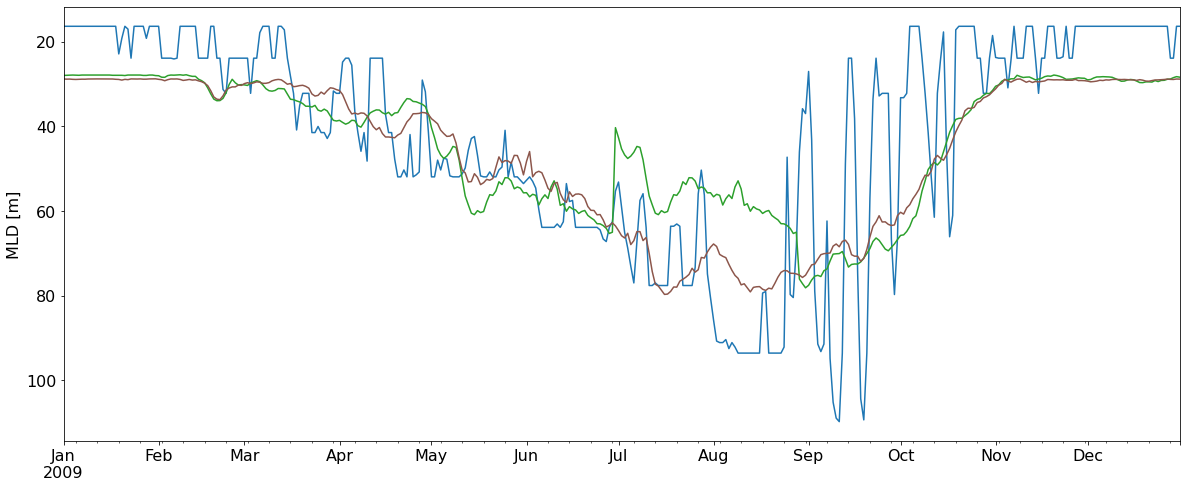

In [17]:
plt.rcParams['font.size'] = 16
plt.rcParams['font.family'] = 'Arial'

plt.figure(figsize=(20,8))
MLD['INALT'].plot(color='tab:blue',label='KFS119 (calculated from output)')
MLD['ROMS'].plot(color='tab:green')
MLD['ROMSchild'].plot(color='tab:brown')
plt.ylabel('MLD [m]')
plt.gca().invert_yaxis();

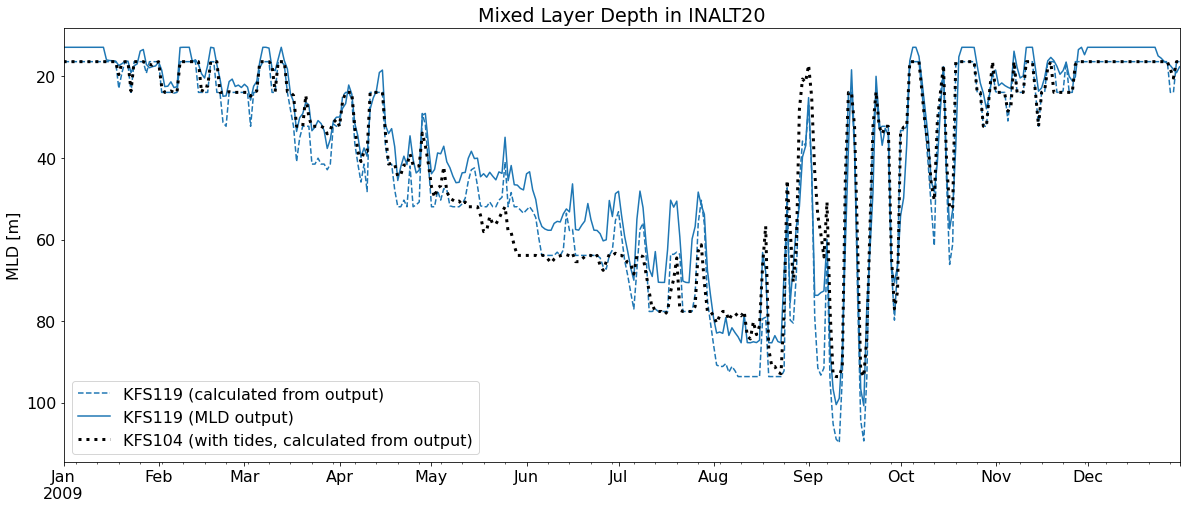

In [18]:
plt.rcParams['font.size'] = 16
plt.rcParams['font.family'] = 'Arial'

plt.figure(figsize=(20,8))
MLD['INALT'].plot(color='tab:blue',label='KFS119 (calculated from output)',linestyle='--')
(MLD_Franziska_sliced).plot(color='tab:blue',label='KFS119 (MLD output)') #.resample(time_counter='1M').mean()
MLD_tides['INALT'].plot(color='black',linestyle='dotted',label='KFS104 (with tides, calculated from output)',linewidth=3)
plt.ylabel('MLD [m]')
plt.title('Mixed Layer Depth in INALT20')
plt.legend()
plt.gca().invert_yaxis();